## MERISKILL PYTHON PROJECT
### Setting up of the working environment

In [2]:
# importing required libraries
import numpy as np # for mathematical operations on arrays
import pandas as pd # for working with datasets (analysing, cleaning, exploring & manipulating)
import seaborn as sns # for general & statistical graphing
import matplotlib.pyplot as plt  # for graphical plotting & data visualization (MATLAB clone)

# importing modelling libraries
from sklearn.preprocessing import StandardScaler # for standarzation
from sklearn.ensemble import RandomForestClassifier # for classification
from sklearn.linear_model import LogisticRegression # for implimentation of logistic regression
from sklearn.model_selection import train_test_split # for splitting arrays into random train & test subsets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score # for metrics computation

### Loading the dataset

In [3]:
path = "/Users/Mudambo/Desktop/Data_Analysis/Meriskill/Diabetes.csv" # defining the path
data = pd.read_csv(path) # reading the file path
data # displaying the dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## DESCRIPTIVE ANALYSIS
- Here, we'll unmask the data by explorating it to reveal trends and vital connections vital. We'll delve into each feature, understanding its landscape through measures like mean and scatter plots. Then, we'll build bridges between features, uncovering relationships that will used as a guide in the model's path. This exploration will ensure a model grounded in data.

### i) Dataframe information

Getting a summary of the dataframe structure and content:

In [4]:
data.info() #general information about the dataset(rows, columns & variables info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- From the non-null count in the output above, it is evident that there were no missing values i.e 768 non-null column counts out of the 768 total entries.
- This can also be visualized using a heatmap as:

<Axes: >

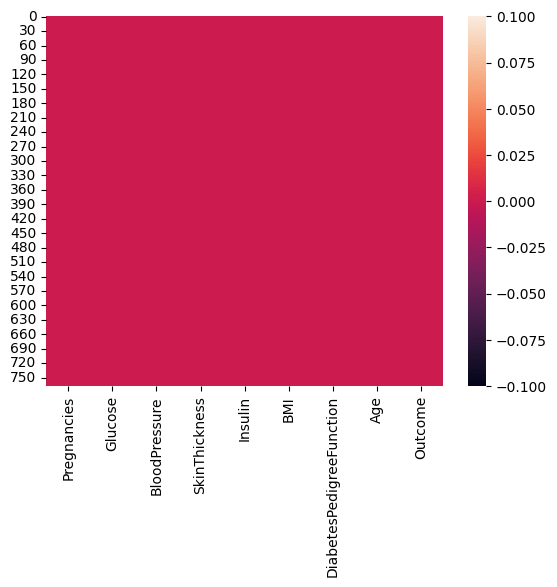

In [5]:
sns.heatmap(data.isnull()) # visualizing specifically for missing values

### ii) Dataframe summary

A descriptive statistics of the dataset:

In [6]:
data.describe().T # .T transposes the description for a better output readability

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- Above is a summary statistics output for each column in the dataframe  i.e the respective count, mean, standard deviation, minimum, first quartile, second quartile (median), third quartile, and the maximum.

## DATA PREPARATION
- This is a crucial transformation step that will ensure quality of the data.

### i) Missing values

In [7]:
# validating if it is true that there are no missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- There no missing data.

### ii) Duplication

In [8]:
# checking for duplicates
print("There are {} duplication instances in the dataframe." .format(data.duplicated().sum()))

There are 0 duplication instances in the dataframe.


### iii) Outliers

In [9]:
# identifying columns with numerical data types
numerics = data.select_dtypes(include=['number']).columns
# handling outliers using interquartile range (IQR) approach 
def handler(df, column): # defining a function that uses IQR method to identify & replace outlier(s) in specified column
    Q1 = df[column].quantile(0.25) # defining the first quartile
    Q3 = df[column].quantile(0.75) # defining the second quartile
    IQR = Q3 - Q1 # defining the  interquatile range
    lowerb = Q1 - 1.5*IQR # defining lower boundary
    upperb = Q3 + 1.5*IQR # defining upper boundary
    df[column] = df[column].apply(lambda x: lowerb if x < lowerb else (upperb if x > upperb else x))
    return df # returning
# applying the outlier handling function to each specified column
for column in numerics: # iterating 
    data = handler(data, column) # calling
    print("\nUpdated dataframe without outliers:") # dataframe output header
    print(data.head(10)) # displaying first few (10) records of the updated dataframe


Updated dataframe without outliers:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148             72             35        0  33.6   
1          1.0       85             66             29        0  26.6   
2          8.0      183             64              0        0  23.3   
3          1.0       89             66             23       94  28.1   
4          0.0      137             40             35      168  43.1   
5          5.0      116             74              0        0  25.6   
6          3.0       78             50             32       88  31.0   
7         10.0      115              0              0        0  35.3   
8          2.0      197             70             45      543  30.5   
9          8.0      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32      

## EXPLANATORY DATA ANALYSIS
- This is a crucial investigation and summarization step applied to the data to gain insights and understand its underlying patterns, relationships and other key details.

## i) Univariate Analysis
- Visualizing the distribution of each variable using histograms:

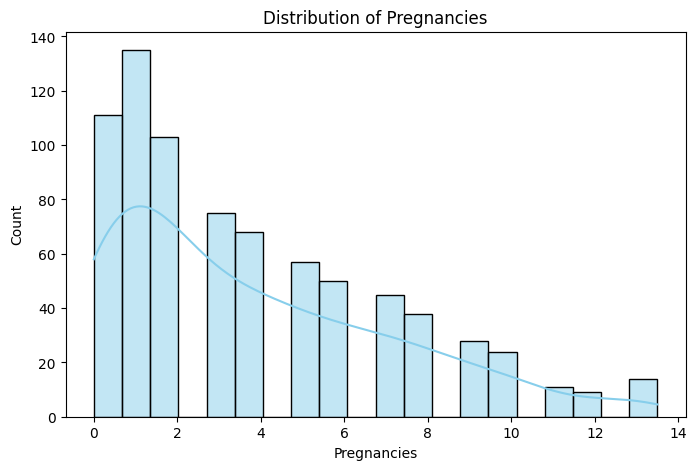

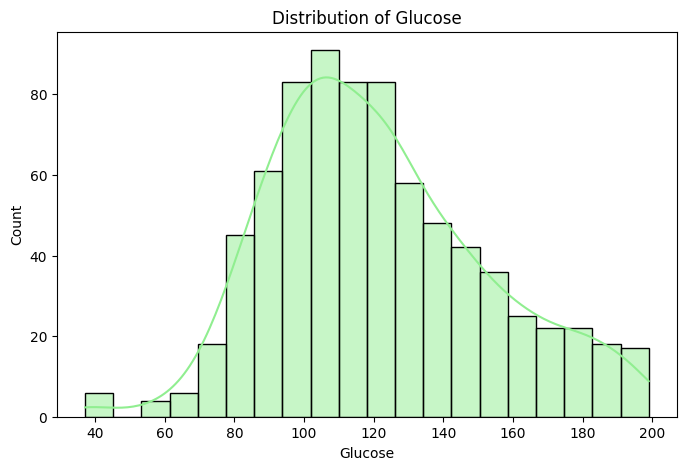

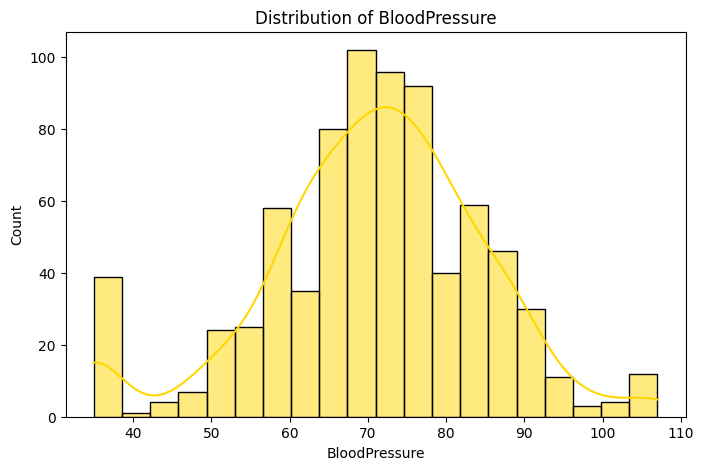

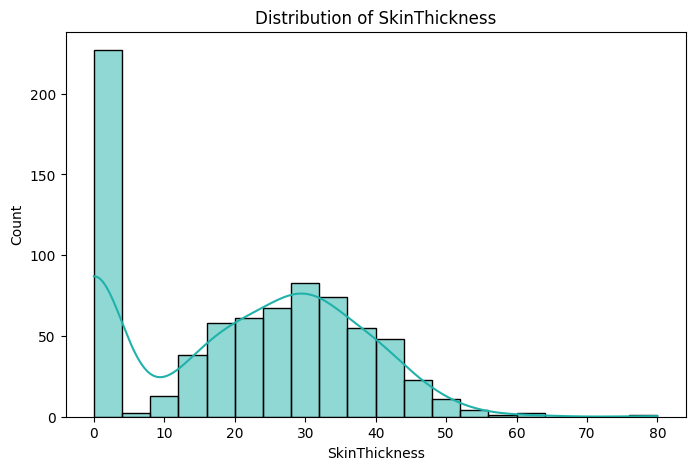

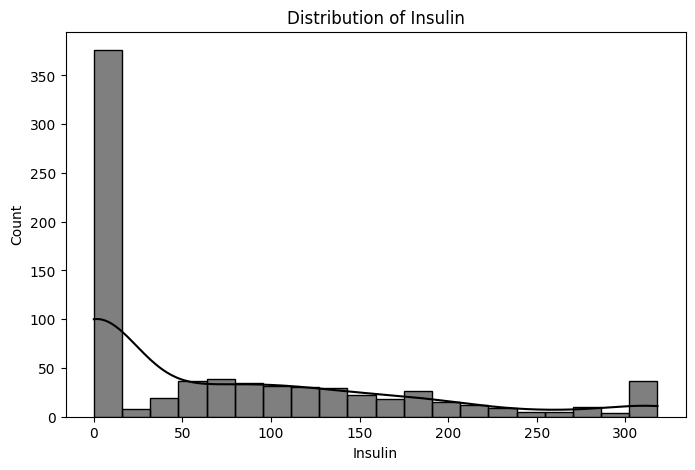

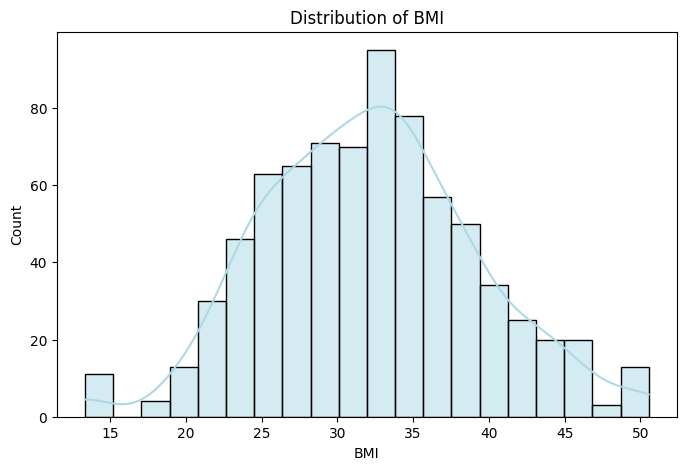

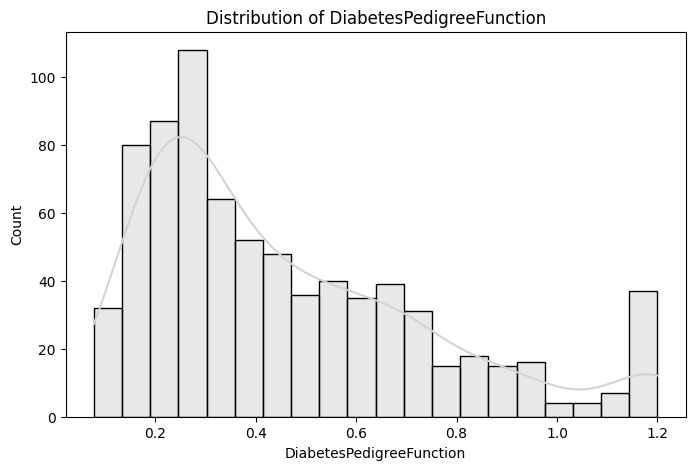

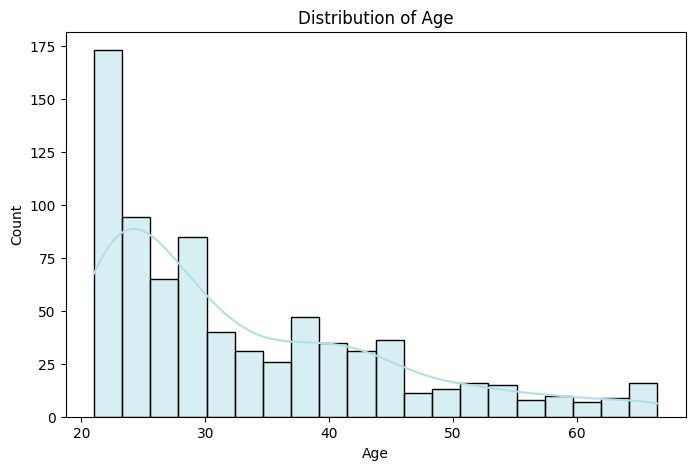

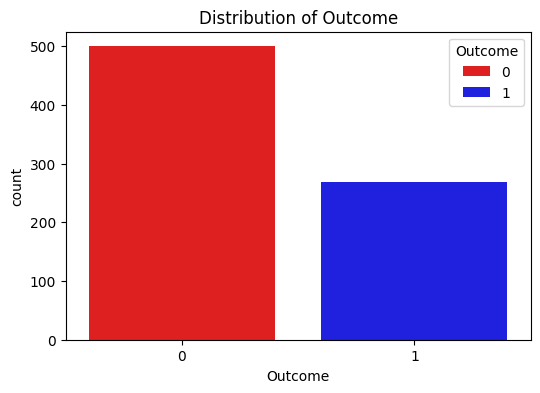

In [10]:

# defining visualization colors
colors = ['skyblue', 'lightgreen', 'gold', 'lightseagreen', 'black', 'lightblue', 'lightgray', 'powderblue']

# defining a function for plotting numerical variables
for i, column in enumerate(data.select_dtypes(include=['int64', 'float64']).columns):
    if column == 'Outcome': # excluding 'Outcome' column
        continue 
    plt.figure(figsize=(8, 5)) # specifying width & height size
    sns.histplot(data[column], kde=True, bins=20, color=colors[i]) # each column visualiazation
    plt.title(f'Distribution of {column}') # plot title
    plt.show() #dislaying the plot

# plotting categorical variable i.e 'Outcome'
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Outcome', data=data, hue='Outcome',palette=['red', 'blue']) # 'Outcome' column visualiazation
plt.title('Distribution of Outcome') 
plt.show()

- From the above univariate visualizations, we can be able to identify the distributions of each and every single variable. This will help in narrowing down exactly to what types of bivariate and multivariate analysis we should carry out.

## ii) Bivariate Analysis
- Visualizing the relationship between key variables using a correlation matrix, and a scatter plot:

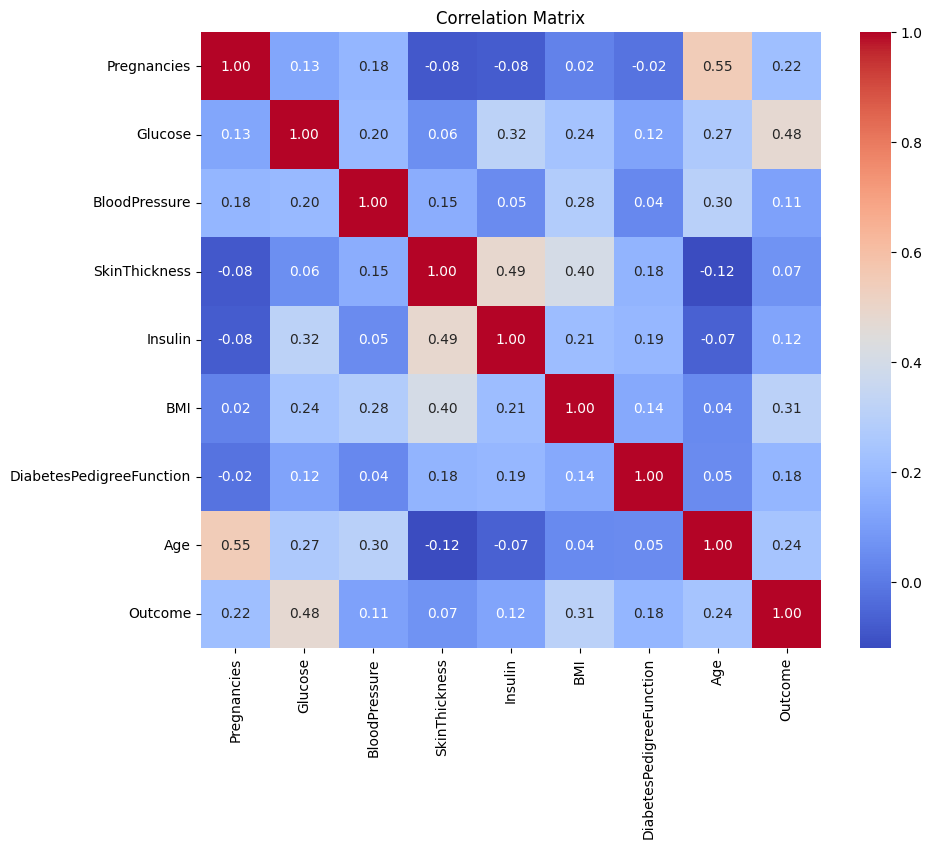

In [11]:
# Display a correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

From the above correlation matrix output:

- *Pregnancies, blood pressure, skin thickness, diabetes pedigree function, and insulin have a weak positive correlation whereas body mass index, glucose, and age have a moderate positive correlation with the outcome (diabetes).*
- *In this case, connections visible in the data point to the fact that higher glucose levels, body mass index, and being at an older age are more linked to the chances of having diabetes. However, the relationships aren't extremely strong — some are moderately strong, while others are weaker. Well, it is important to note that just because two things are correlated does not imply that one causes the other. Understanding the context and having knowledge about the subject is key for a deeper understanding.*
- *We can further investigate the major variables with the greater impact on the outcome (two variables with highest correlation value) using a scatter plot to explore as:*

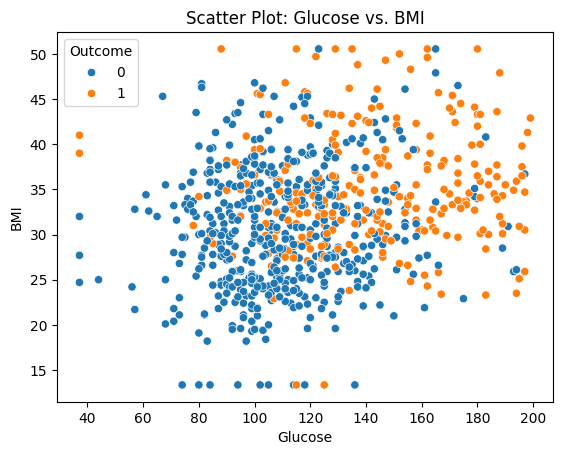

In [12]:
# Scatter plot between two variables (e.g., Glucose and BMI)
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=data)
plt.title("Scatter Plot: Glucose vs. BMI")
plt.show()

From the scatter plot output:
- *There is a positive relationship between body mass index and glucose levels but not a perfect one. It can be seen that distribution of those with a positive outcome are highly scattered far right within the visualization meaning that high glucose levels and body mass index increases the chances of a positive outcome while the inverse is also true. However, it is important to note that this relationship is not that perfect since there are other unmentioned factors that can affect the outcome like diet and exercise amongst.*

## iii) Multivariate Analysis
- Visualizing the relationship among key variables using a pairplot:

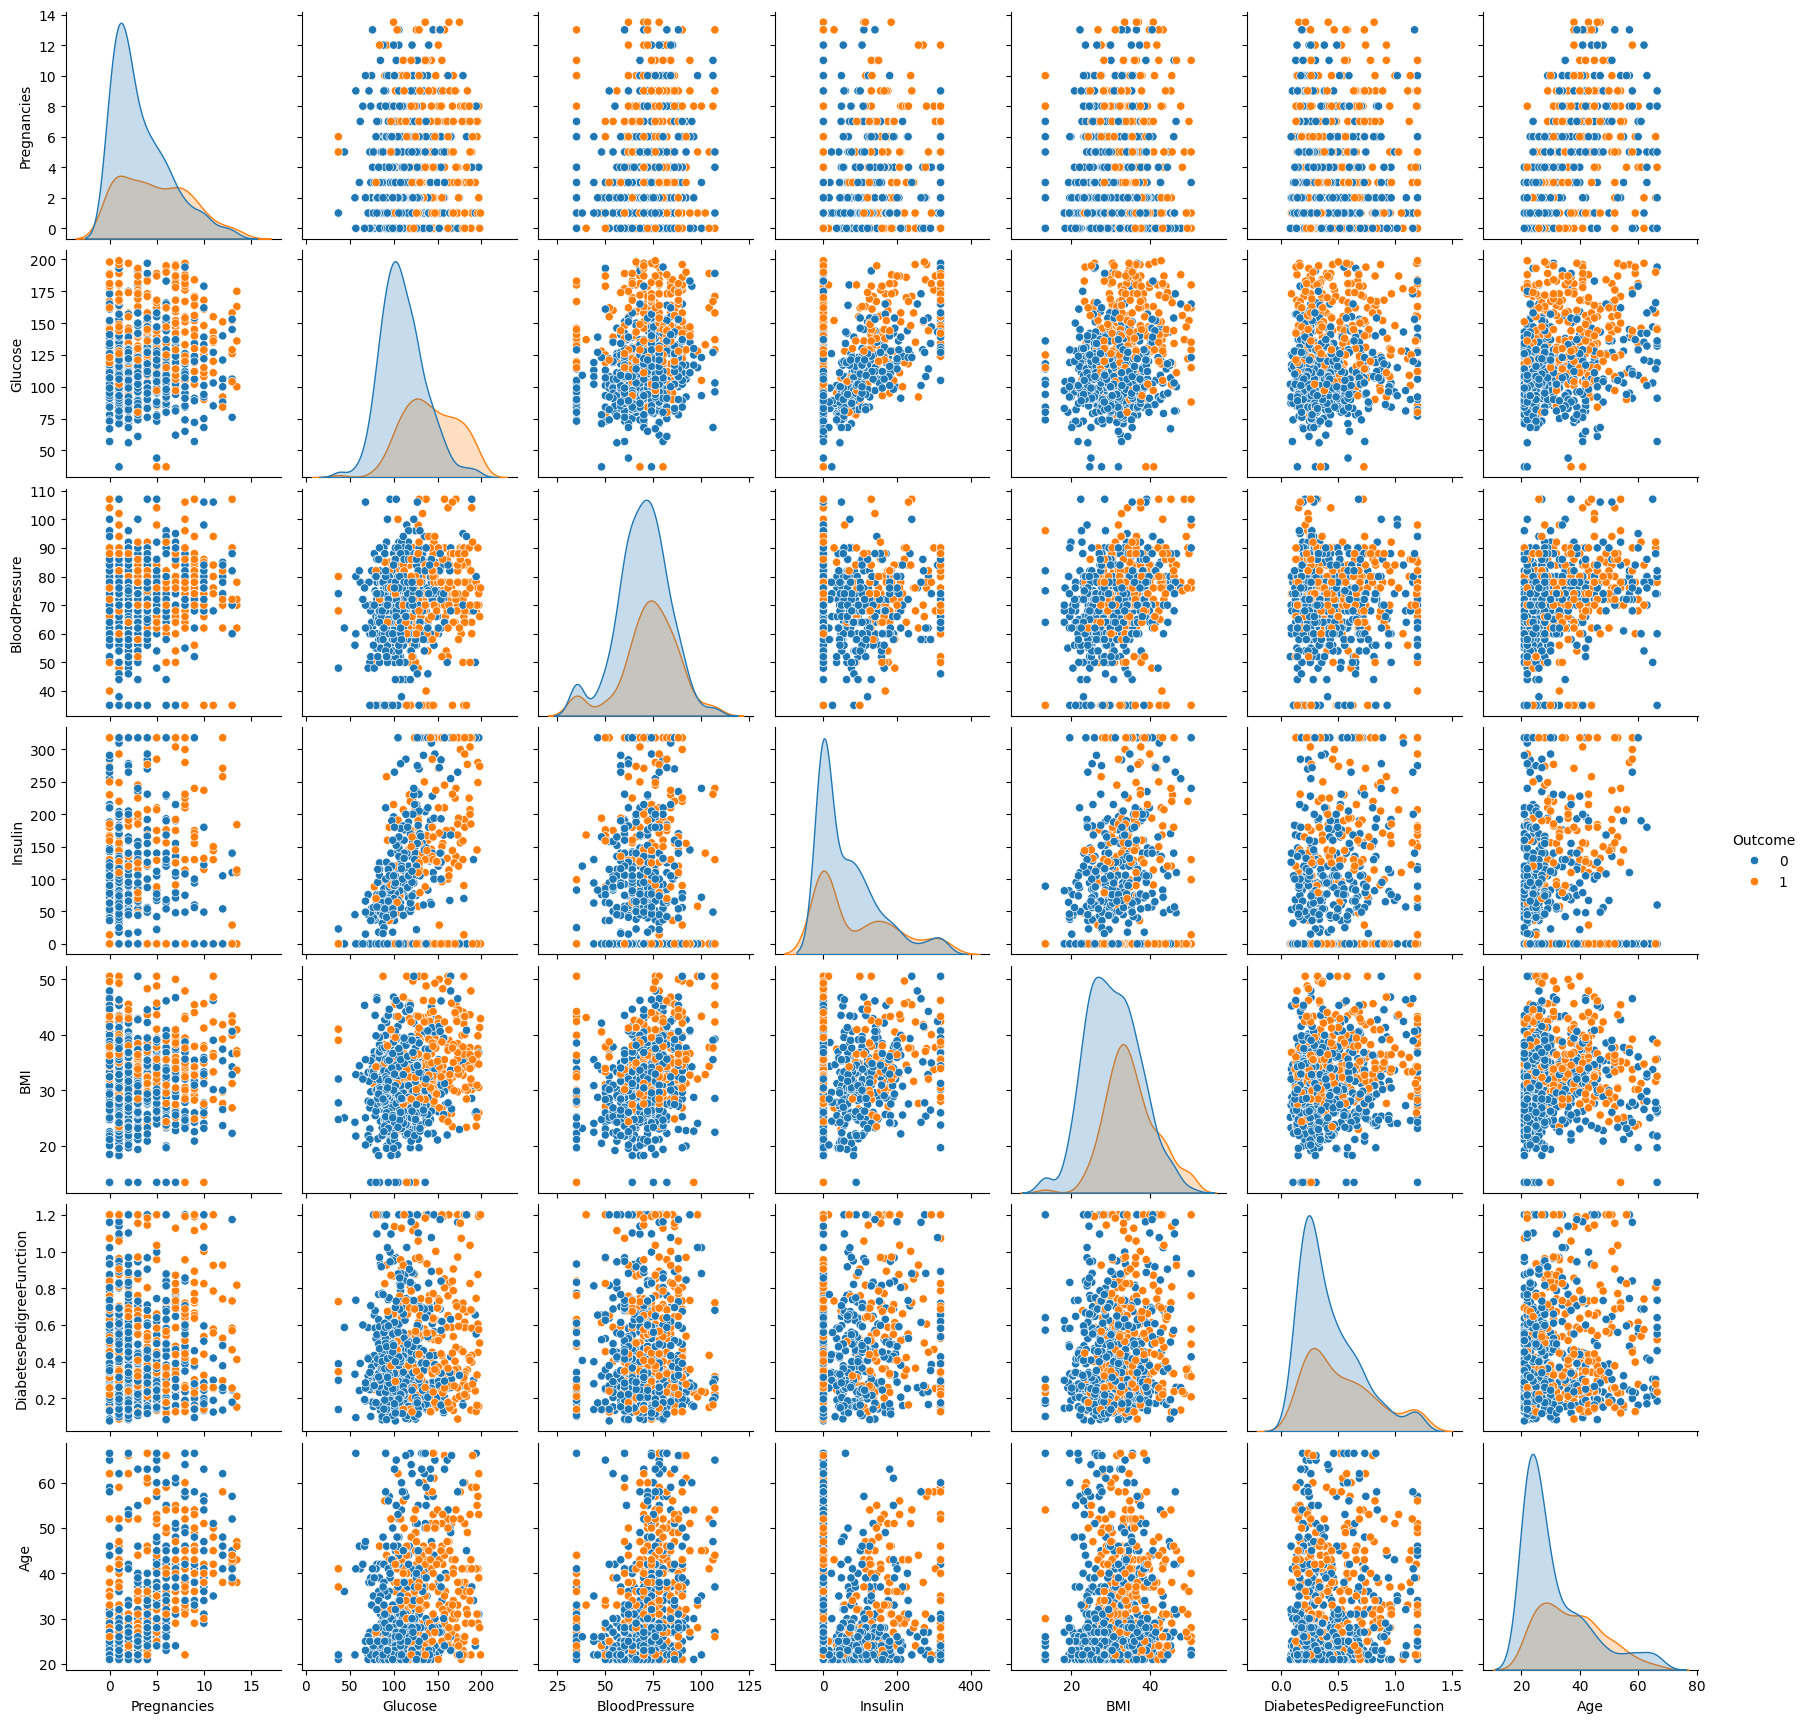

In [13]:

# Display pair plots for selected variables
selected_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
sns.pairplot(data[selected_columns], hue='Outcome')
plt.show()

From the above pair plot output, some key findings are that:
- *Glucose and body mass index: There is a positive correlation between glucose and BMI, meaning that people with higher BMI tend to have higher blood sugar levels. - This is consistent with what we know about the relationship between obesity and diabetes.*
- *Blood pressure and insulin: There is a weak positive correlation between blood pressure and insulin, meaning that people with higher blood pressure tend to have higher insulin levels. - This may be because high blood pressure can put a strain on the kidneys, which can lead to impaired insulin production.*
- *Age and diabetes pedigree function: There is a weak positive correlation between age and diabetes pedigree function, meaning that people who are older tend to have a higher score on the diabetes pedigree function. - Which is a measure of their genetic risk for diabetes.*
- *Outcome and the other variables: The outcome variable (whether or not someone has diabetes) is not strongly correlated with the other variables, suggesting that there are many factors that contribute to the development of diabetes, and probably no single factor is a good predictor of the disease.*



## DATA PRE-PROCESSING
- In this crutial phase, raw and unstructured data is transformed into an understandable format that can then be used to train the then to used machine learning model. This will ensure improved data quality, reduced dimensionality, featured engineering and improved model pperformance.
- In this case, our categorial data is already in a machine understandable format (0 and 1) therefore encoding step is unneccesary. From the descriptive statistics, there were variations within the data therefore scaling would be of great importance:

                    Feature  Importance
1                   Glucose    0.266421
5                       BMI    0.173220
7                       Age    0.131018
6  DiabetesPedigreeFunction    0.117908
2             BloodPressure    0.090619
0               Pregnancies    0.085668
4                   Insulin    0.068011
3             SkinThickness    0.067135


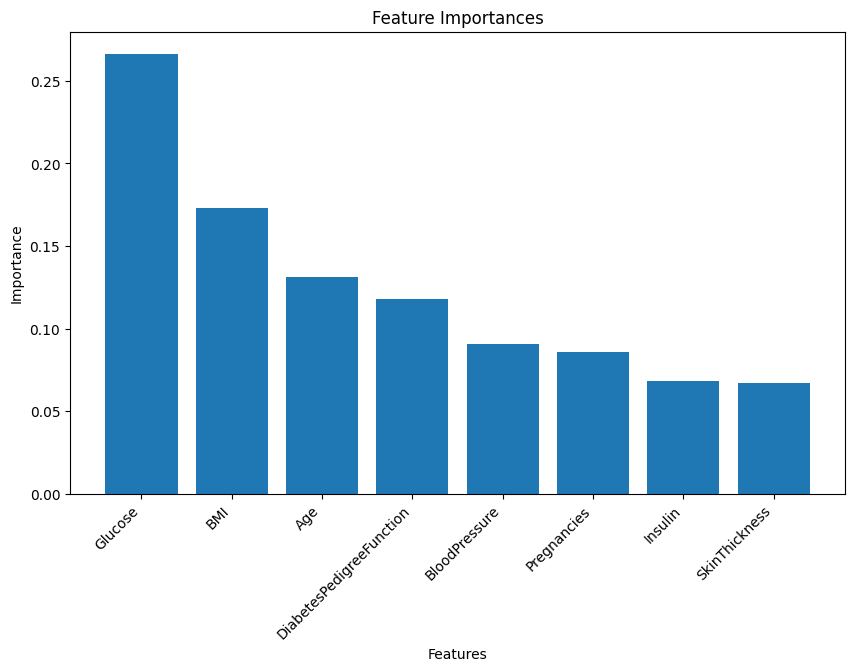

In [14]:
# Separating the features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']
# Declaring a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y) # fitting the model
# Getting feature importances
feature_importances = rf_classifier.feature_importances_
# Creating a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# Sorting the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df) # displaying the sorted DataFrame
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.show()

From the features importances scores above:
- *Glucose has the highest importance score meaning that it has the strongest influence on the model's predictions. Similarly, other features like body mass index, age, and diabetes pedigree function as the other feature importances decrease gradually also seem to be significant contributors. Despite the fact that features like pregnacies, insulin and skin thickness having lower importance scores, they could still play a role in the model's decision-making process thereby should be used.*

In [15]:
# selecting features to be scaled (target variable i.e'Outcome' being excluded)
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# scaling process
scaler = StandardScaler() # defining a scaler
scaler.fit(data[features]) # fitting the scaler to training data 
scaled_data = scaler.transform(data[features]) # transforming data 
scaled_df = pd.DataFrame(scaled_data, columns=features) # creating a new dataframe with scaled features
scaled_df['Outcome'] = data['Outcome'] # adding the target variable column back to the scaled dataframe
print('\nScaled DataFrame:') # scaled dataframe title
scaled_df # displaying scaled dataframe


Scaled DataFrame:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.647150,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691,1
1,-0.848970,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304,0
2,1.245598,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252,1
3,-0.848970,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828,0
4,-1.148194,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199,1
...,...,...,...,...,...,...,...,...,...
763,1.844045,-0.646072,0.374620,1.735982,1.137221,0.109998,-1.008772,2.564372,0
764,-0.549746,0.027714,-0.048273,0.409758,-0.787602,0.663583,-0.416642,-0.533513,0
765,0.347926,-0.004371,0.092691,0.157144,0.410066,-0.841032,-0.749497,-0.275356,0
766,-0.848970,0.156054,-0.753094,-1.295388,-0.787602,-0.287447,-0.385109,1.187534,1


## BASE MODEL BUILDING

In this phase, we will create the baseline model by:
- *Splitting the data.*
- *Choosing an algorithm.*
- *Initializing the chosen model.*
- *Training the model on the training set.*
- *Evaluating the trained model on the validation set.*

Accuracy: 0.7532467532467533


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



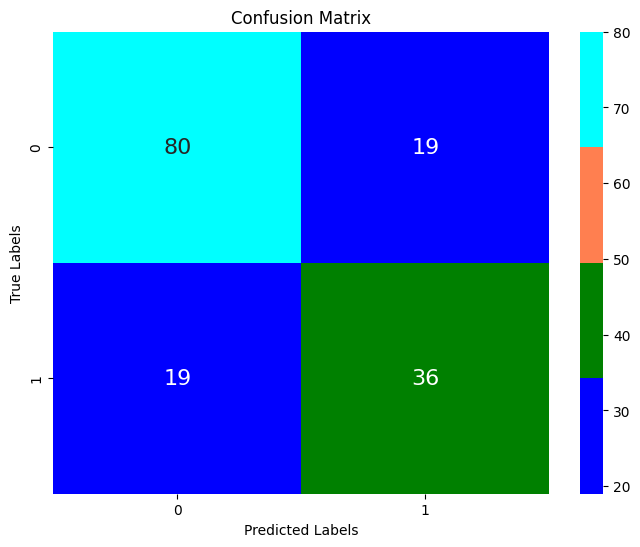

In [16]:
# variables selection
X = scaled_df.drop('Outcome', axis=1) # independent variables
y = scaled_df['Outcome'] # target (response or predictor) variable
# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the logistic regression model
model = LogisticRegression(random_state=42) # classification (with a set random seed)
model.fit(X_train, y_train) # model training
# predicting on the test set
y_pred = model.predict(X_test) # test set prediction
y_prob = model.predict_proba(X_test)[:, 1]  # obtaining probabilities of +ve class (class 1)
# model performance evaluation
accuracy = accuracy_score(y_test, y_pred) # overall model correctness, given by: no. of correct prediction/total no. of prdictions
print(f"Accuracy: {accuracy}")
print('\n') # spacing
classification_rep = classification_report(y_test, y_pred) # comprehensive report 
print(f"Classification Report:")
print(classification_rep)
conf_matrix = confusion_matrix(y_test, y_pred) # detailed breakdown of model predictions
# confusion matrix visualization using a heatmap
color = ["blue", "green", "coral", "cyan"] # confusion matrix quadrant colors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=color, annot_kws={"size": 16})
plt.title('Confusion Matrix') # matrix title
plt.xlabel('Predicted Labels') # x-axis title
plt.ylabel('True Labels') # y-axis title
plt.show()

From the above performance report:
- *Accuracy - In context, the model achieves an accuracy of 75.32% which implies that it correctly predicts the diabetes outcome in 75% of the cases.*
- *Classification report - In context, the model performs well for Class 0 with a higher precision (81%) implying that it accurately identifies most true Classes 0 cases and minimizes false positives but conversly it performs weaker for Class 1 with a lower precision (65%) implying that it misses some true Class 1 cases and probably might generate some false positives. In a nutshell, there is a class imbalance which can generally influence the model's performance.*
- *Confusion matrix - In context, the model correctly identifies 36 true positives cases {i.e those with diabetes, matrix(1,1)} while it correctly identified 80 true negative cases {i.e those without diabetes, matrix(0,0)}. The model misclassified 19 cases as both not having diabetes {i.e false negatives, matrix(0,1)} and having diabetes {i.e false positives, matrix(1,0)}*